#### Libraries

In [3]:
# Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Importing Datasets

In [4]:
df = pd.read_csv('bitcoin.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


#### **Bitcoin 2013'ten gunumuze kadar günlük Kapanış fiyatlarinin gosterilmesi** 

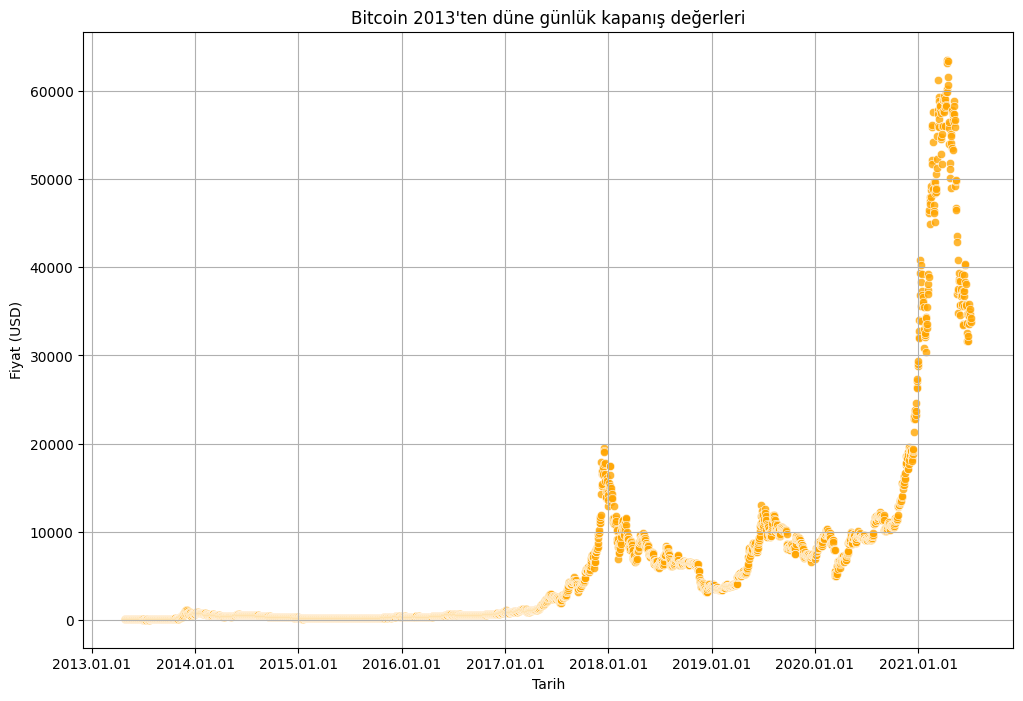

In [5]:

df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Date', y='Close', alpha=0.8, color='orange')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.title("Bitcoin 2013'ten düne günlük kapanış değerleri")
plt.grid(True)
plt.show()

#### **Bitcoinin gunluk kapanis degerlerinin histogram grafiginin cizilmesi** 

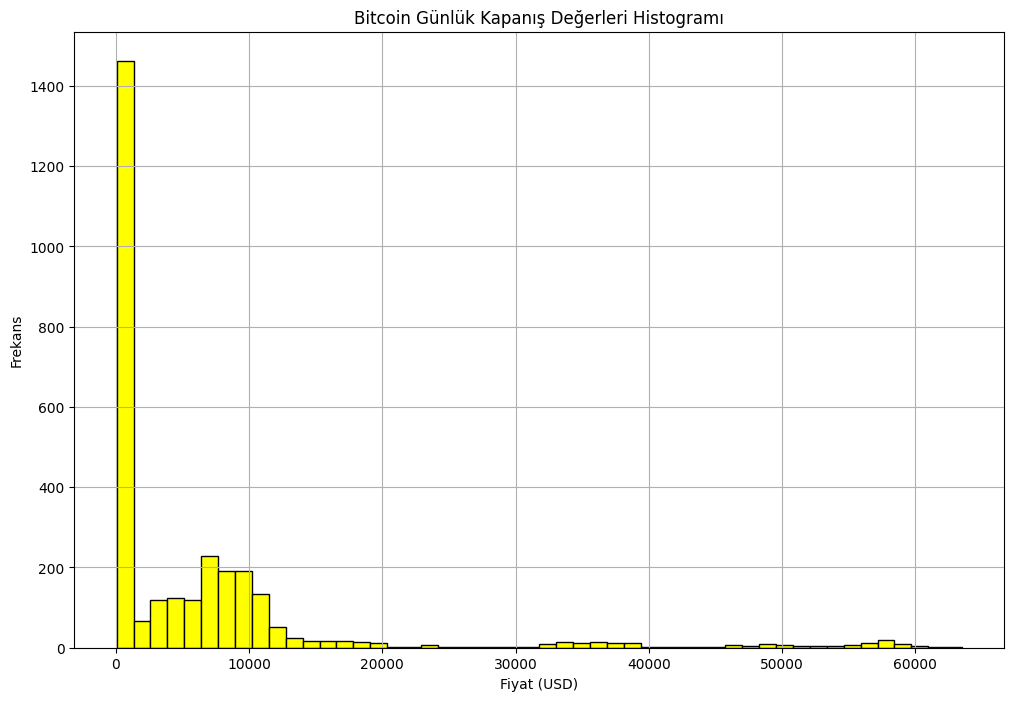

In [6]:

plt.figure(figsize=(12, 8))
plt.hist(df['Close'], bins=50, edgecolor='k', color='yellow')
plt.title('Bitcoin Günlük Kapanış Değerleri Histogramı')
plt.xlabel('Fiyat (USD)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

#### **Modeli egitirken kullanilacak olan bagimsiz degiskenin tanimlanmasi** 
- **Projetion_bitcoin degiskeni bitcoinin tahmin edilecek olan gun sayisini belirlemektedir**
- **Verisetine yeni bir (prediction) sutun eklenir ve kapanis degerleri projection_bitcoin sayisi kadar yukari kaydirilarak bu sutuna eklenir**
- **Bagimsiz degisken olan close sutunu X_Bitcoin degiskenine atanir**


In [7]:

bitcoin_df = pd.read_csv('BTC-USD.csv')
projection_bitcoin = 30
bitcoin_df['Prediction'] = bitcoin_df[['Close']].shift(-projection_bitcoin)
X_Bitcoin = np.array(bitcoin_df[['Close']])
X_Bitcoin = X_Bitcoin[:-projection_bitcoin]
print(X_Bitcoin)

FileNotFoundError: [Errno 2] No such file or directory: 'BTC-USD.csv'

#### **Modeli egitirken kullanilacak olan bagimli degiskenin tanimlanmasi** 
- **Bagimsiz degisken sutunu y_Bitcoin degiskenine tanimlanir**


In [ ]:

y_Bitcoin = bitcoin_df['Prediction'].values
y_Bitcoin = y_Bitcoin[:-projection_bitcoin]
print(y_Bitcoin)
x_train_Bitcoin, x_test_Bitcoin, y_train_Bitcoin, y_test_Bitcoin = train_test_split(X_Bitcoin,y_Bitcoin,test_size=0.20)

[  383.757996   391.441986   389.54599  ... 42520.402344 43442.855469
 42614.550781]


#### **Lineer regresyon kullanilarak modelin egitilmesi** 
- **lineer regresyon linReg_Bitcoin degiskenine tanimlarin**
- **lineer regresyon kullanilarak moedel egitilir**
- **.score() fonksiyonu kullanilarak modelin regersyon guvenilirligi hesaplanmistir**

In [ ]:

linReg_Bitcoin = LinearRegression()
linReg_Bitcoin.fit(x_train_Bitcoin,y_train_Bitcoin)
linReg_confidence_Bitcoin = linReg_Bitcoin.score(x_test_Bitcoin,y_test_Bitcoin)
print("Bitcoin için Lineer Regresyon Güvenirliği: %",round((linReg_confidence_Bitcoin*100),3))

Bitcoin için Lineer Regresyon Güvenirliği: % 91.852


#### **Parametrelerin bulunmasi** 
- **.coefficient() fonksiyonu ile denklemin katsayisi(w) bulunmustur**
- **.intercept_() fonksiyonu ile denklemin sabit sayisi(b) bulunmustur**


In [ ]:
w = linReg_Bitcoin.coef_[0].round(4)
b = linReg_Bitcoin.intercept_.round(2)
print("w = {} \n b={}".format(w,b))

w = 0.9691 
 b=803.75


#### **Tahmin yapabilmek icin sondan projection_bitcoin degiskeni kadar kapanis degerinin degiskene atilmasi** 

In [ ]:

x_projection_Bitcoin = np.array(bitcoin_df[['Close']])[-projection_bitcoin:]
print(x_projection_Bitcoin)

[[37858.492188]
 [37712.746094]
 [38688.75    ]
 [39476.332031]
 [39978.390625]
 [41980.097656]
 [44080.648438]
 [43746.445313]
 [43292.664063]
 [44166.601563]
 [43725.984375]
 [43779.699219]
 [41243.832031]
 [41450.222656]
 [42890.742188]
 [43023.972656]
 [41929.757813]
 [42240.117188]
 [41364.664063]
 [42623.539063]
 [42270.527344]
 [43652.25    ]
 [43869.152344]
 [43997.902344]
 [43739.542969]
 [43016.117188]
 [43613.140625]
 [42520.402344]
 [43442.855469]
 [42614.550781]]


#### **.predict() fonksiyonu kullanilarak istenilen deger kadar tahmin olusturulmasi** 

In [ ]:

linReg_prediction_Bitcoin = linReg_Bitcoin.predict(x_projection_Bitcoin)
print(linReg_prediction_Bitcoin)

[37492.64790705 37351.40448309 38297.25578997 39060.5063146
 39547.05434412 41486.92077254 43522.57727977 43198.69900366
 42758.93684112 43605.87497469 43178.87018451 43230.92556572
 40773.40128831 40973.41569521 42369.43191353 42498.5463684
 41438.13612527 41738.90727859 40890.50034363 42110.48374393
 41768.37794527 43107.41375434 43317.61513189 43442.38753804
 43192.00990021 42490.93358671 43069.51262174 42010.5333238
 42904.48824391 42101.77314531]


#### **Tahmin edilen degerlerin grafikte gosterilmesi** 

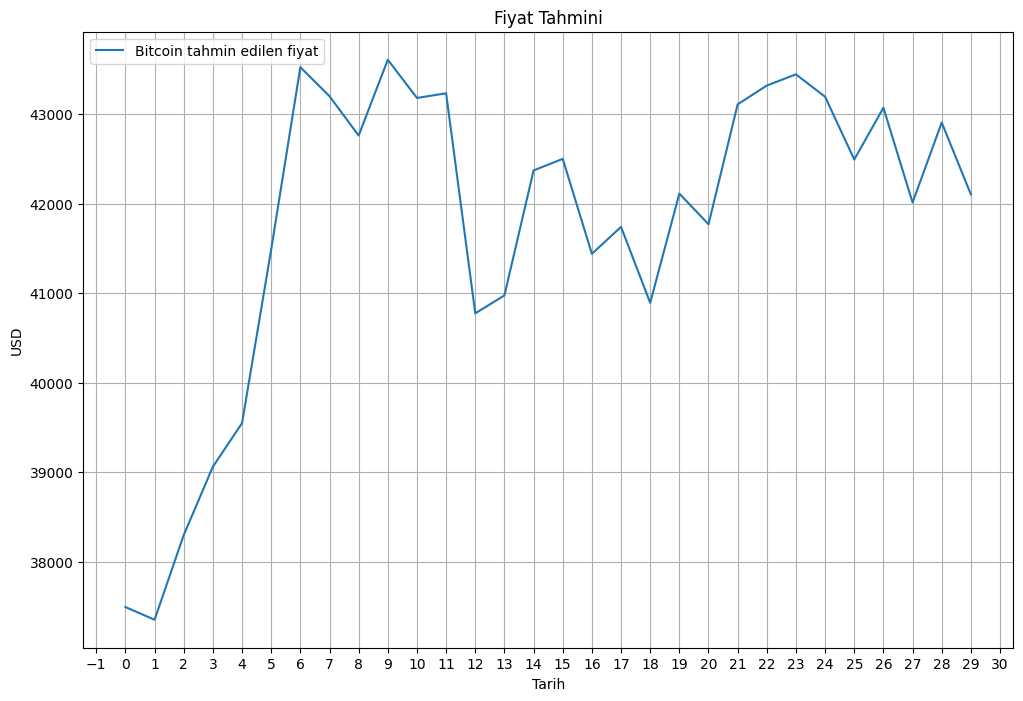

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(linReg_prediction_Bitcoin, label='Bitcoin tahmin edilen fiyat')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.title('Fiyat Tahmini')
plt.xlabel('Tarih')
plt.ylabel('USD')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### **Simdide modelimizin olusturdugu grafik ile gercek degerleri karsilastiralim**

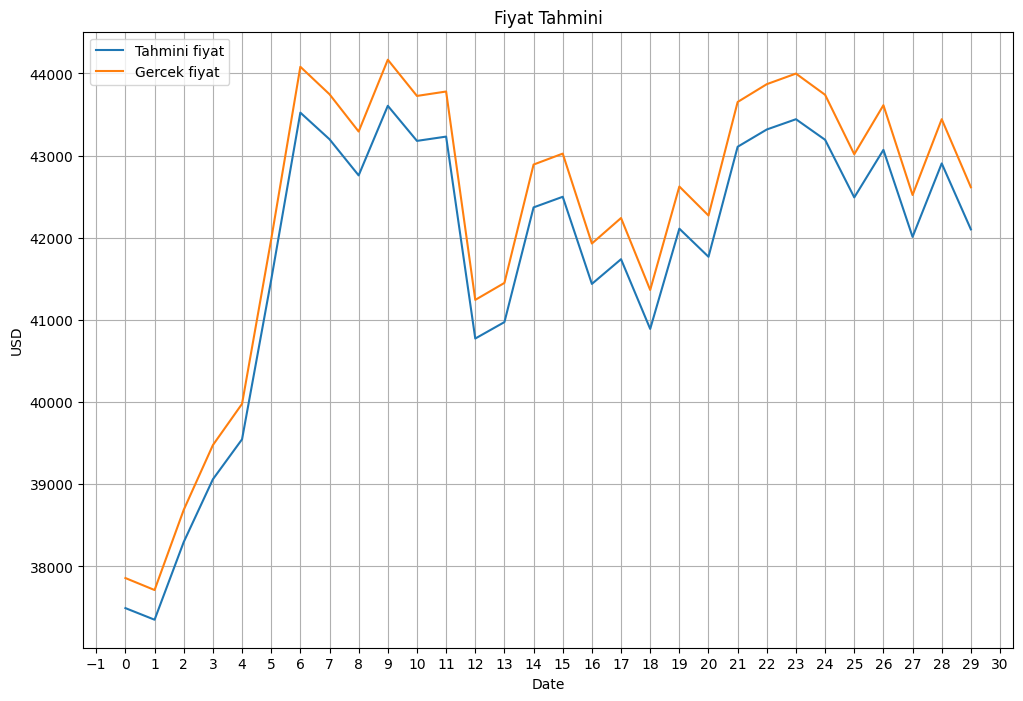

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(linReg_prediction_Bitcoin, label='Tahmini fiyat')
plt.plot(x_projection_Bitcoin, label='Gercek fiyat')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.title('Fiyat Tahmini')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()